## Unsupervised Methods

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [53]:
df = pd.read_csv('Data/Pipeline_data_toy_bin.csv', index_col=[0])
#df = pd.read_csv('Data/Pipeline_data_bin.csv', index_col=[0])

df.head()

,bmi,cigs_before_preg,birth_time,m_deliveryweight,f_age,m_age,m_height_in,num_prenatal_visits,prior_births_dead,prior_births_living,...,m_morbidity,riskf,payment,mn_prenatalcare_began,delivery_method,res_status,prev_cesarean,infant_sex,weight_change,birthweight_bin
0,46.3,0.0,1341.0,310.0,27.499772,25.0,64.0,18.0,0.0,0.0,...,0.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,40.0,1
1,25.5,0.0,621.0,179.0,19.738769,16.0,65.0,6.0,0.0,0.0,...,0.0,0.0,1.0,6.0,1.0,2.0,0.0,0.0,26.0,0
2,21.8,0.0,741.0,154.0,27.000000,24.0,63.0,15.0,0.0,0.0,...,0.0,0.0,2.0,2.0,1.0,1.0,0.0,1.0,31.0,1
3,22.7,0.0,750.0,150.0,31.000000,28.0,62.0,16.0,0.0,1.0,...,0.0,1.0,1.0,3.0,2.0,1.0,1.0,0.0,26.0,0
4,34.0,3.0,1423.0,192.0,28.000000,31.0,63.0,8.0,0.0,1.0,...,0.0,0.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0,0


In [54]:
X = df.drop(['birthweight_bin'], axis=1)
y = df['birthweight_bin']

### Pre-processing

In [6]:
#num_cols = ('cigs_before_preg','m_height_in','num_prenatal_visits','prior_births_dead','prior_terminations',
            'prepreg_weight','time_since_menses','weight_change','mn_prenatalcare_began')

#bin_cols = ('gonorrhea','labour_induced','admit_icu','m_transferred','infections','m_morbidity','riskf',
            'prev_cesarean','infant_sex')

#cat_cols = ('birth_attendant','birth_place','birth_dy','f_education','f_race6','m_nativity','m_education',
            'm_hispanic','m_race6','payment','delivery_method','res_status')

In [11]:
num_cols = ('bmi','cigs_before_preg','birth_time','m_deliveryweight','f_age','m_age','m_height_in',
            'num_prenatal_visits','prior_births_dead','prior_births_living','prior_terminations','prepreg_weight',
            'num_prev_cesareans','time_since_menses','weight_change','mn_prenatalcare_began')

bin_cols = ('gonorrhea','labour_induced','admit_icu','m_transferred','infections','m_morbidity','riskf',
            'prev_cesarean','infant_sex')

cat_cols = ('birth_attendant','birth_place','birth_mn','birth_dy','f_education','f_hispanic','f_race6',
            'm_nativity','m_education','m_hispanic','m_race6','payment','delivery_method','res_status')

In [13]:
num_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())])

cat_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(drop='first'))])


preprocessor = ColumnTransformer(
        remainder='passthrough', #passthough features not listed
        transformers=[
            ('num', num_transformer , num_cols),
            ('cat', cat_transformer , cat_cols)
        ])

In [14]:
X_processed = preprocessor.fit_transform(X)

In [15]:
X_processed = pd.DataFrame(X_processed)

In [16]:
X_processed.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,2.810418,-0.230973,0.196021,2.893451,-0.594191,-0.695671,-0.049740,1.641846,-0.083903,-0.885747,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-0.250946,-0.230973,-0.953470,-0.233957,-1.754119,-2.253880,0.310014,-1.326265,-0.083903,-0.885747,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.795515,-0.230973,-0.761888,-0.830791,-0.668885,-0.868806,-0.409494,0.899818,-0.083903,-0.885747,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.663052,-0.230973,-0.747520,-0.926284,-0.071061,-0.176268,-0.769248,1.147161,-0.083903,-0.104459,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.000092,0.366727,0.326935,0.076396,-0.519429,0.343135,-0.409494,-0.831580,-0.083903,-0.104459,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


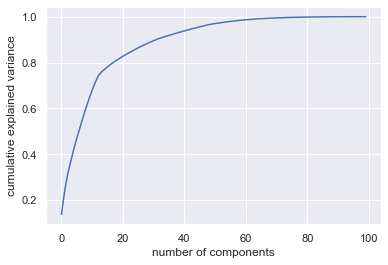

In [17]:
pca = PCA().fit(X_processed)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [18]:
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_processed)

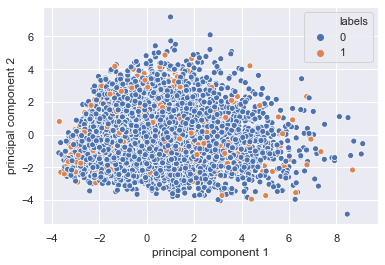

In [19]:
# Extract the projections of the first 2 components
pca2 = X_pca[:, :2]

# Plot the first 2 components
principalDf = pd.DataFrame(data = pca2, 
                           columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([y, principalDf], axis = 1)
finalDf.columns = ['labels', 'principal component 1', 'principal component 2']

ax = sns.scatterplot(x="principal component 1", y="principal component 2", hue='labels', data=finalDf)
plt.show()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### KMeans

In [ ]:
plt.scatter(principalDf.iloc[:, 0], principalDf.iloc[:, 1], c=y, cmap='autumn')
plt.show()

def plot_kmeans_n(n=2, data_set=X):
    kmeans = KMeans(n_clusters=n)
    
    # Predict the centers of the datasets using fit_predict
    y_pred = kmeans.fit_predict(data_set)
    
    # Plot
    plt.scatter(data_set.iloc[:, :], data_set.iloc[:, :], c=y_pred)
    plt.title(f'N={n}')
    plt.show()

# Try running this function for different values of n
plot_kmeans_n(2, principalDf)

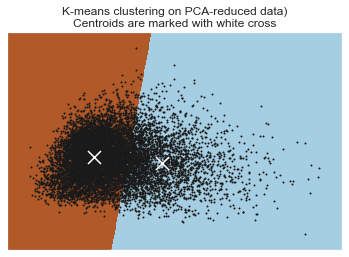

In [22]:
kmeans2 = KMeans(n_clusters=2).fit(principalDf)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = principalDf.iloc[:, 0].min() - 1, principalDf.iloc[:, 0].max() + 1
y_min, y_max = principalDf.iloc[:, 1].min() - 1, principalDf.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans2.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(principalDf.iloc[:, 0], principalDf.iloc[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans2.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

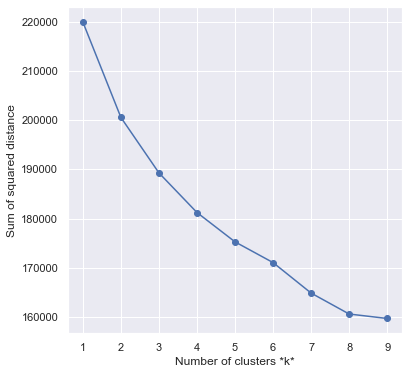

In [55]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_processed)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [25]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#### Try with only numeric features / only subsets of interesting features

In [63]:
X_num = X[['bmi','cigs_before_preg','birth_time','m_deliveryweight','f_age','m_age','m_height_in',
           'num_prenatal_visits','prior_births_dead','prior_births_living','prior_terminations','prepreg_weight',
           'num_prev_cesareans','time_since_menses','weight_change','mn_prenatalcare_began']]

In [64]:
scale = StandardScaler()
X_num_s = scale.fit_transform(X_num)

In [65]:
X_num.columns

Index(['bmi', 'cigs_before_preg', 'birth_time', 'm_deliveryweight', 'f_age',
       'm_age', 'm_height_in', 'num_prenatal_visits', 'prior_births_dead',
       'prior_births_living', 'prior_terminations', 'prepreg_weight',
       'num_prev_cesareans', 'time_since_menses', 'weight_change',
       'mn_prenatalcare_began'],
      dtype='object')

In [69]:
X_num_s = pd.DataFrame(X_num_s)
X_num_s.columns = X_num.columns
X_num_s.head()

,bmi,cigs_before_preg,birth_time,m_deliveryweight,f_age,m_age,m_height_in,num_prenatal_visits,prior_births_dead,prior_births_living,prior_terminations,prepreg_weight,num_prev_cesareans,time_since_menses,weight_change,mn_prenatalcare_began
0,2.810418,-0.230973,0.196021,2.893451,-0.594191,-0.695671,-0.049740,1.641846,-0.083903,-0.885747,0.643220,2.627516,-0.372296,-1.061473,0.669958,-0.593919
1,-0.250946,-0.230973,-0.953470,-0.233957,-1.754119,-2.253880,0.310014,-1.326265,-0.083903,-0.885747,-0.477463,-0.151832,-0.372296,0.032711,-0.215591,2.062843
2,-0.795515,-0.230973,-0.761888,-0.830791,-0.668885,-0.868806,-0.409494,0.899818,-0.083903,-0.885747,-0.477463,-0.864486,-0.372296,0.032711,0.100676,-0.593919
3,-0.663052,-0.230973,-0.747520,-0.926284,-0.071061,-0.176268,-0.769248,1.147161,-0.083903,-0.104459,0.643220,-0.840731,1.332226,0.073236,-0.215591,0.070271
4,1.000092,0.366727,0.326935,0.076396,-0.519429,0.343135,-0.409494,-0.831580,-0.083903,-0.104459,0.643220,0.774617,-0.372296,0.113762,-1.860183,-0.593919


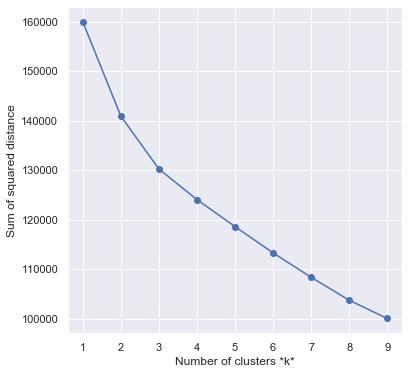

In [72]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_num_s)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [80]:
X_kmeans = X_num_s[['bmi','cigs_before_preg']]

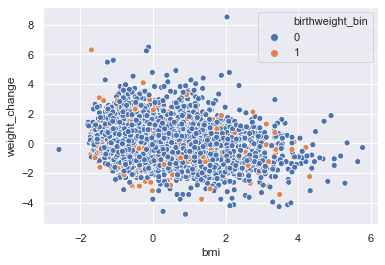

In [91]:
sns.scatterplot(X_num_s['bmi'], X_num_s['weight_change'], hue = y);